# PROBLEM:
As a Premier League Football Data Analyst, your role involves deriving insights from the recently concluded 2023/2024 season. You're tasked with delivering a thorough analysis of both home and away team performances, covering metrics such as red cards, shots taken, shots on target, and more.

# About The Data

Date: Date of the match

Time: Time of the match

HomeTeam: Home team name

AwayTeam: Away team name

FTHG: Full-time home team goals

FTAG: Full-time away team goals

FTR: Full-time result (H=Home win, D=Draw, A=Away win)

HTHG: Half-time home team goals

HTAG: Half-time away team goals

HTR: Half-time result (H=Home win, D=Draw, A=Away win)

Referee: Referee for the match

HS: Home team shots

AS: Away team shots

HST: Home team shots on target

AST: Away team shots on target

HF: Home team fouls

AF: Away team fouls

HC: Home team corners

AC: Away team corners

HY: Home team yellow cards

AY: Away team yellow cards

HR: Home team red cards

AR: Away team red cards

In [6]:
import pandas as pd
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Premier_League_Football = pd.read_csv('/content/Premier League Football Predictions.csv')
Premier_League_Football

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,11/08/2023,20:00,Burnley,Man City,0,3,A,0,2,...,2.28,1.50,1.95,1.98,1.95,1.97,NaN,NaN,1.92,1.95
1,E0,12/08/2023,12:30,Arsenal,Nott'm Forest,2,1,H,2,0,...,2.63,-2.00,1.95,1.98,1.93,1.97,2.01,2.09,1.95,1.92
2,E0,12/08/2023,15:00,Bournemouth,West Ham,1,1,D,0,0,...,2.12,0.00,2.02,1.91,2.01,1.92,2.06,1.96,1.96,1.91
3,E0,12/08/2023,15:00,Brighton,Luton,4,1,H,1,0,...,2.48,-1.75,2.01,1.92,2.00,1.91,2.14,1.93,2.00,1.86
4,E0,12/08/2023,15:00,Everton,Fulham,0,1,A,0,0,...,1.71,-0.25,2.06,1.87,2.04,1.88,2.08,1.99,1.98,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,19/05/2024,16:00,Crystal Palace,Aston Villa,5,0,H,2,0,...,2.78,-0.75,1.73,2.08,1.78,2.16,1.93,2.21,1.81,2.05
376,E0,19/05/2024,16:00,Liverpool,Wolves,2,0,H,2,0,...,5.17,-2.75,2.07,1.86,2.04,1.85,2.10,1.89,2.04,1.82
377,E0,19/05/2024,16:00,Luton,Fulham,2,4,A,1,2,...,2.69,0.25,2.00,1.93,1.99,1.93,2.02,1.94,1.96,1.91
378,E0,19/05/2024,16:00,Man City,West Ham,3,1,H,2,1,...,4.82,-3.00,2.03,1.90,1.99,1.90,2.05,1.99,1.96,1.91


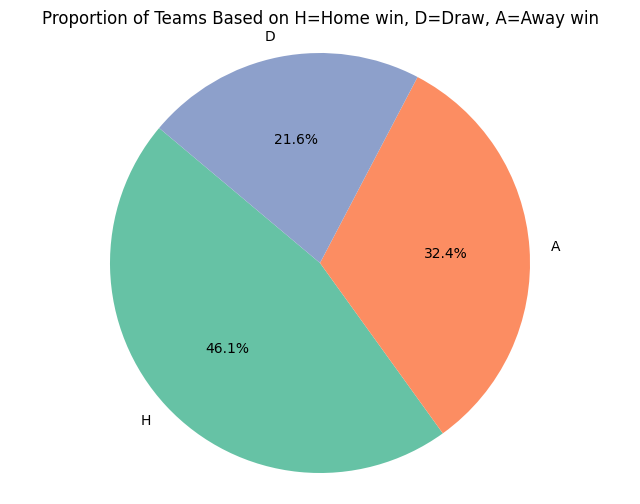

In [ ]:
# Finding percetange ratio of H=Home win, D=Draw, A=Away win teams
FTR_count = Premier_League_Football['FTR'].value_counts()
#colors = ['silver', 'blue','red']
plt.figure(figsize=(8, 6))
plt.pie(FTR_count, labels=FTR_count.index, autopct='%1.1f%%', startangle=140,colors=sns.color_palette('Set2'))
plt.title('Proportion of Teams Based on H=Home win, D=Draw, A=Away win')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In the Premier League 2023/2024 season, home teams have a 46.1% win rate, while away teams have a 32.4% win rate. Additionally, there is a 21.6% chance of matches ending in draws.

Text(0, 0.5, 'Frequency')

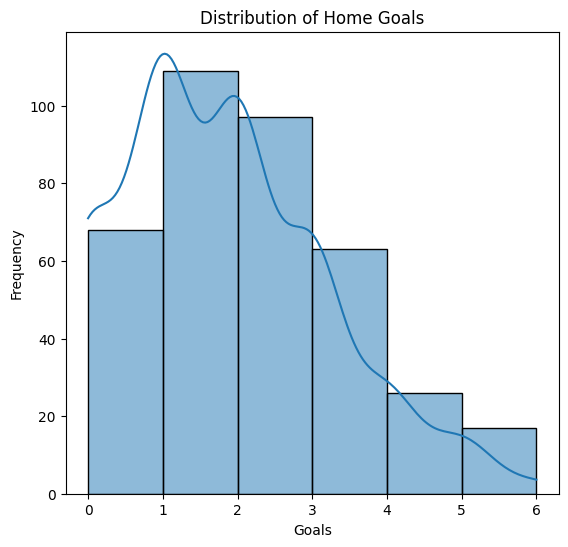

In [ ]:
# Plot distribution of goals
plt.figure(figsize=(14, 6))

# Home goals distribution
plt.subplot(1, 2, 1)
sns.histplot(Premier_League_Football['FTHG'], bins=range(0, Premier_League_Football['FTHG'].max() + 1), kde=True)
plt.title('Distribution of Home Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')

 Most of the home teams scored 1 or 2 goals per game, with an average of around 3 goals. Very few games recorded home teams scoring more than 5 goals.

Text(0, 0.5, 'Frequency')

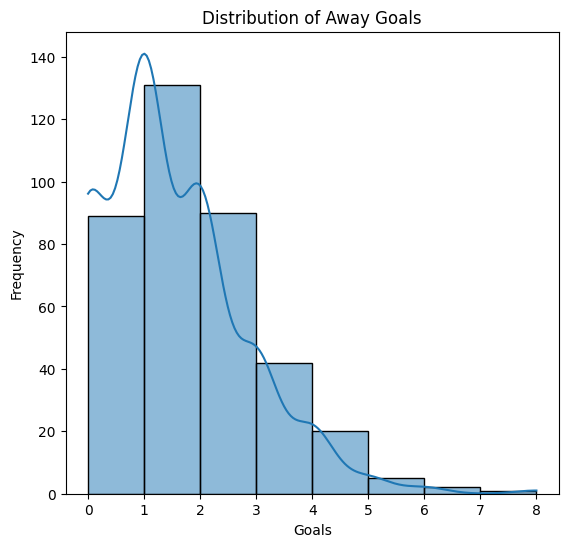

In [ ]:
# Away goals distribution
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
sns.histplot(Premier_League_Football['FTAG'], bins=range(0, Premier_League_Football['FTAG'].max() + 1), kde=True)
plt.title('Distribution of Away Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')

From the chart of away goals scored, we can see that the highest number of goals scored in a match, whether home or away, is by the away team with 8 goals. The number of away teams that scored 2 goals is equal to those that scored 0 goals.

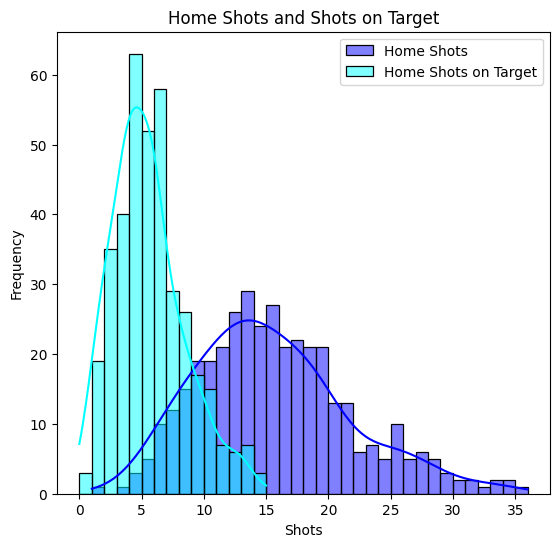

In [ ]:
 # Plot shots comparison
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(Premier_League_Football['HS'], bins=range(0, Premier_League_Football['HS'].max() + 1), kde=True, color='blue', label='Home Shots')
sns.histplot(Premier_League_Football['HST'], bins=range(0, Premier_League_Football['HST'].max() + 1), kde=True, color='cyan', label='Home Shots on Target')
plt.title('Home Shots and Shots on Target')
plt.xlabel('Shots')
plt.ylabel('Frequency')
plt.legend()

Out of 380 home games played, 63 home matches recorded 4 shots on target, 52 had 5 shots on target, and 4 home games saw zero shots on target. The highest number of shots on target in a single home match was 15, which occurred only once. Most home games recorded between 11 and 20 shots per game.

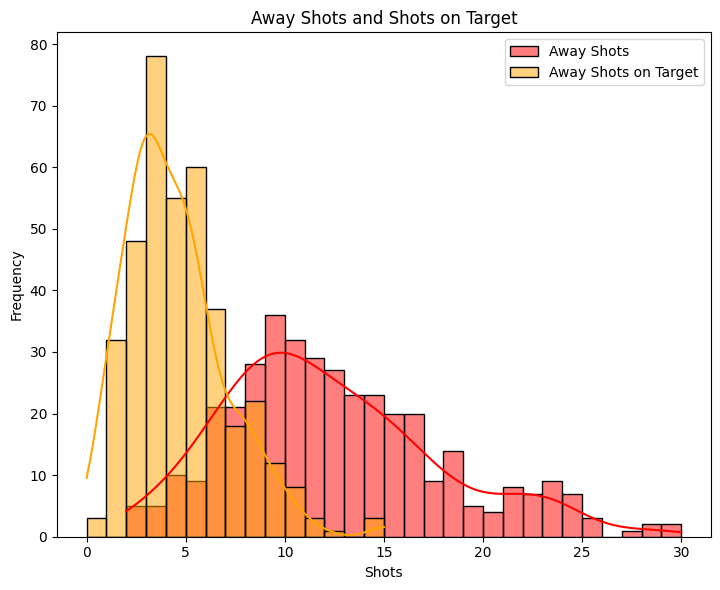

In [ ]:
# Away shots
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
sns.histplot(Premier_League_Football['AS'], bins=range(0, Premier_League_Football['AS'].max() + 1), kde=True, color='red', label='Away Shots')
sns.histplot(Premier_League_Football['AST'], bins=range(0, Premier_League_Football['AST'].max() + 1), kde=True, color='orange', label='Away Shots on Target')
plt.title('Away Shots and Shots on Target')
plt.xlabel('Shots')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

Out of 380 away games played, 78 recorded 3 shots on target, 60 had 5 shots on target, and 3 away games saw zero shots on target. The highest number of shots on target in a single away match was 15, which occurred in just 3 games. Most away games recorded between 6 and 16 shots per game.

In [ ]:
# Calculate the sum of FTHG (Full Time Home Goals)
total_fthg = Premier_League_Football['FTHG'].sum()
total_fthg

684

In [ ]:
# Calculate the sum of FTHG (Full Time Home Goals)
total_ftag = Premier_League_Football['FTAG'].sum()
total_ftag

562

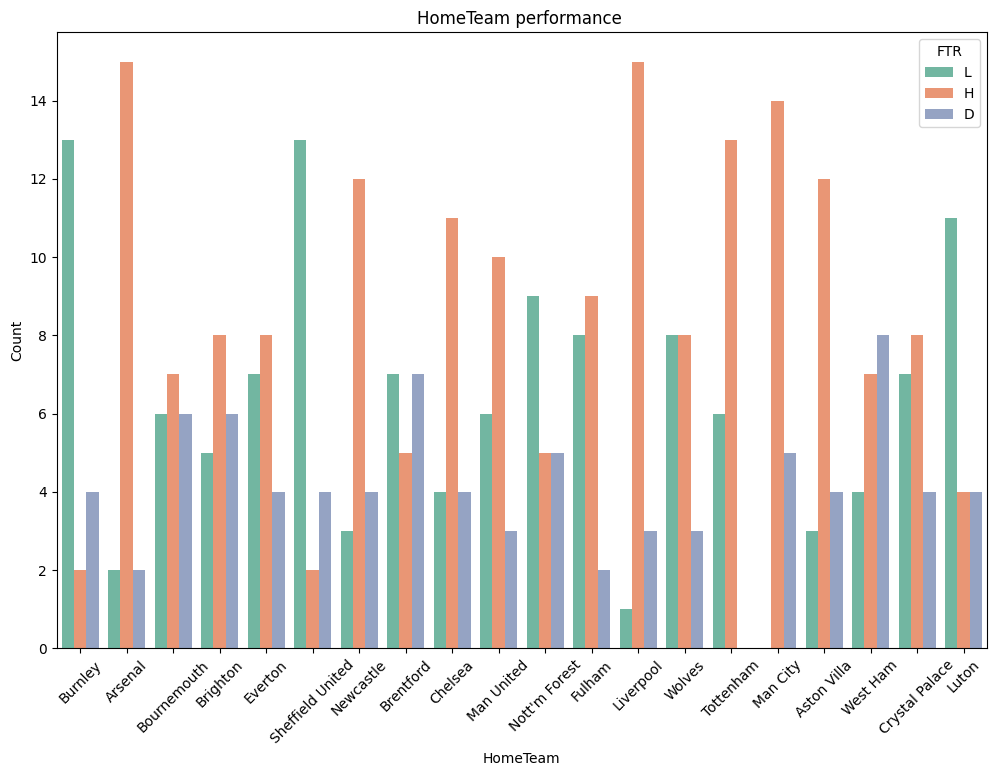

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='HomeTeam', hue='FTR', data=Premier_League_Football, palette='Set2')
plt.title('HomeTeam performance ')
plt.xlabel('HomeTeam')
plt.ylabel('Count')
plt.legend(title='FTR', labels=['L', 'H','D'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


From our graph above, it is evident that Liverpool and Arsenal had the most home wins in the 2023/2024 season, with 15 wins each. They are followed by Manchester City, which secured 14 home wins and notably did not lose any home games. West Ham recorded the most home draws, while Sheffield United and Burnley each had 13 home losses.

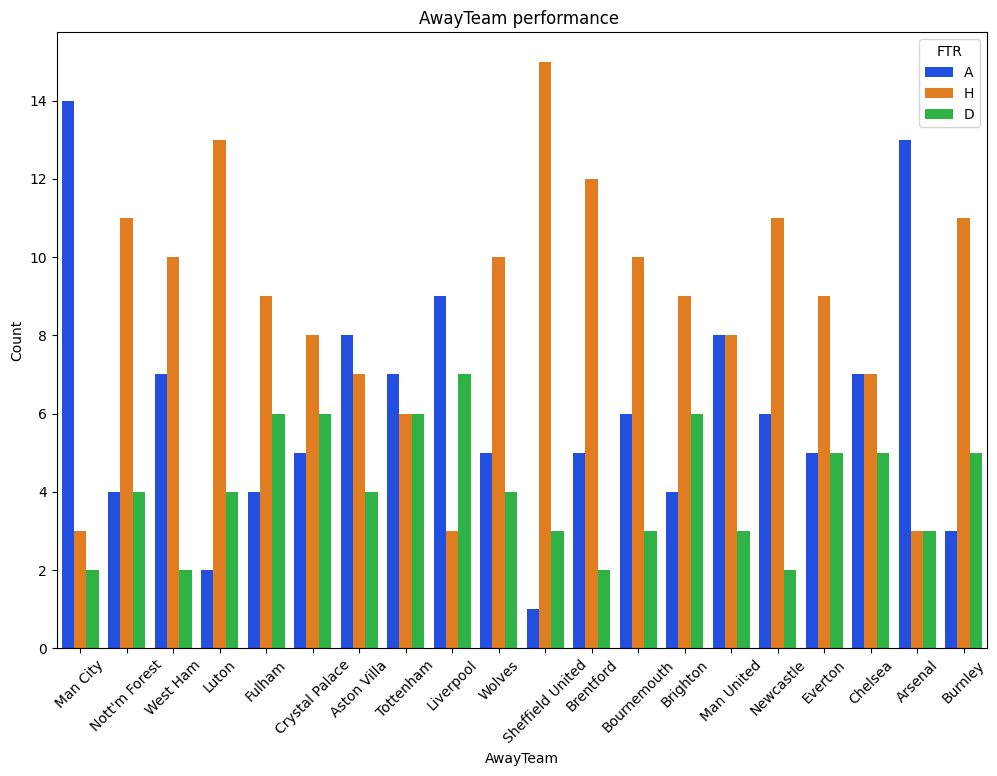

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='AwayTeam', hue='FTR', data=Premier_League_Football, palette='bright')
plt.title('AwayTeam performance ')
plt.xlabel('AwayTeam')
plt.ylabel('Count')
plt.legend(title='FTR', labels=['A', 'H','D'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

From our graph above, it is evident that Manchester City and Arsenal had the most away wins in the 2023/2024 season, with 14 and 13 wins respectively. They are followed by Liverpool, which secured 9 away wins. Liverpool also recorded the most away draws. Sheffield United and Luton had the fewest away wins.

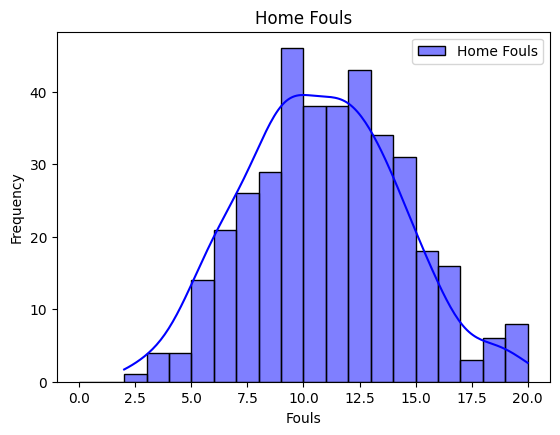

In [ ]:
# Home fouls and cards
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.histplot(Premier_League_Football['HF'], bins=range(0, Premier_League_Football['HF'].max() + 1), kde=True, color='blue', label='Home Fouls')
plt.title('Home Fouls')
plt.xlabel('Fouls')
plt.ylabel('Frequency')
plt.legend()

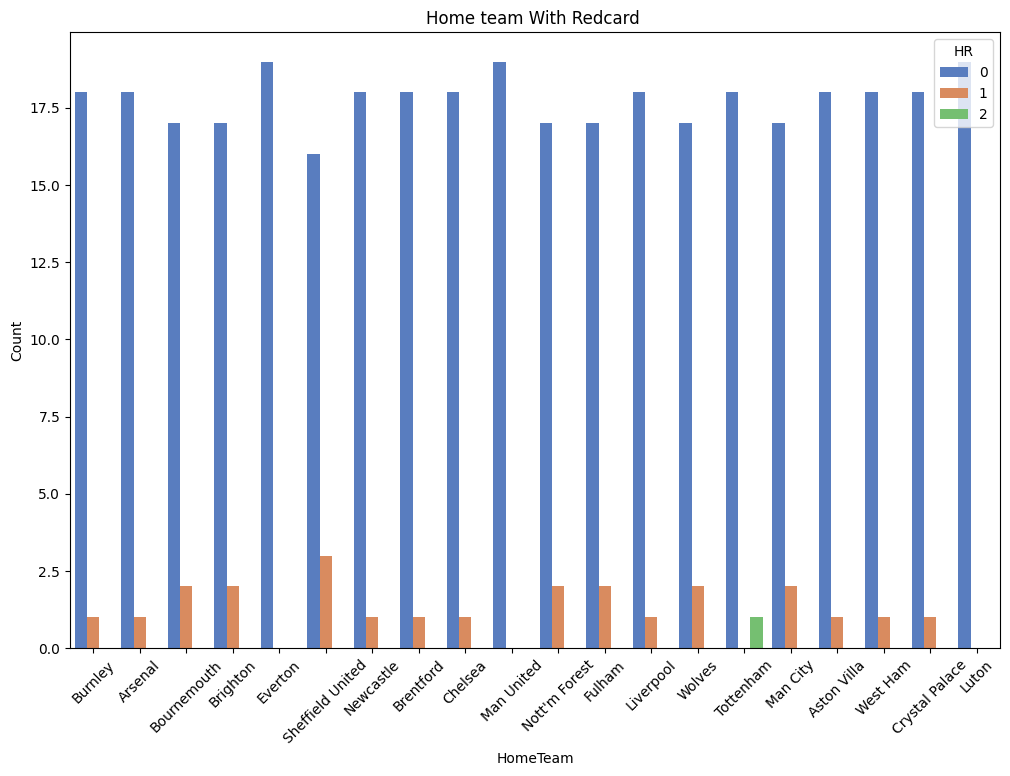

In [3]:
plt.figure(figsize=(12, 8))
sns.countplot(x='HomeTeam', hue='HR', data=Premier_League_Football, palette='muted')
plt.title('Home team With Redcard ')
plt.xlabel('HomeTeam')
plt.ylabel('Count')
plt.legend(title='HR', labels=['0', '1','2'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The home team red card chart above reveals that only a few teams—Luton, Everton, and Manchester United—never received a red card in home matches for the 2023/2024 season. Sheffield United received the highest number of red cards with three. Bournemouth, Brighton, Manchester City, and Wolves each received two red cards. Notably, Tottenham received two red cards in a single home match.

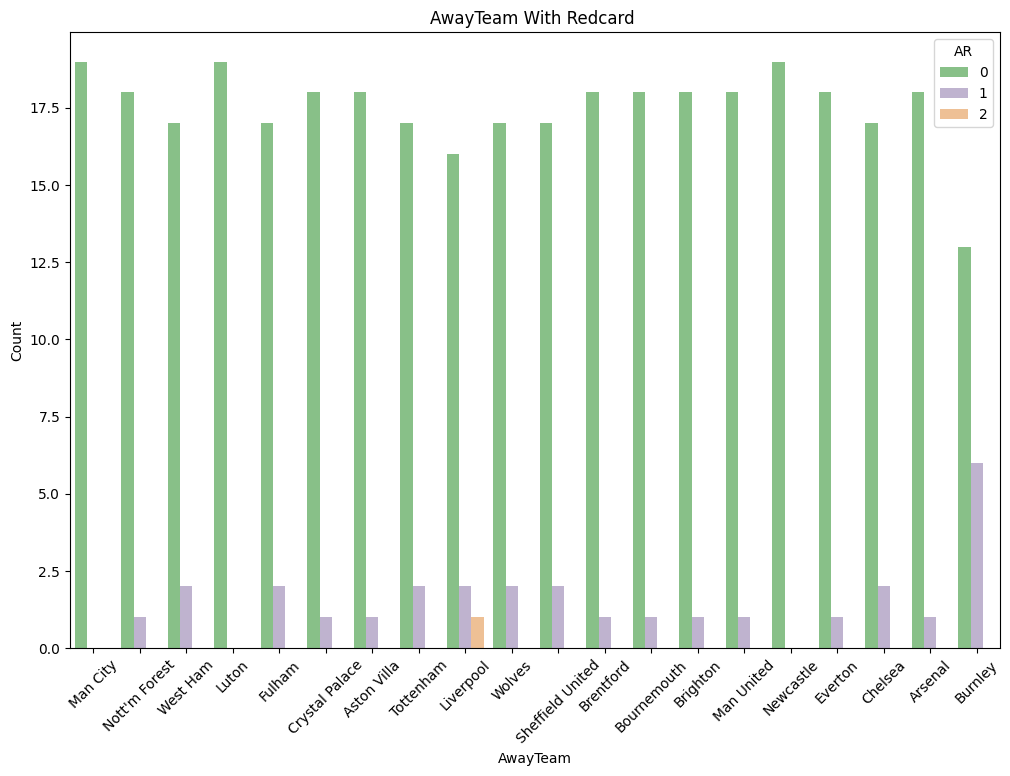

In [5]:
plt.figure(figsize=(12, 8))
sns.countplot(x='AwayTeam', hue='AR', data=Premier_League_Football, palette='Accent')
plt.title('AwayTeam With Redcard ')
plt.xlabel('AwayTeam')
plt.ylabel('Count')
plt.legend(title='AR', labels=['0', '1','2'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The away team red card chart above shows that only a few teams—Luton, Manchester City, and Newcastle United—never received a red card in away matches for the 2023/2024 season. Burnley received the highest number of red cards, with six. Notably, Liverpool received two red cards in a single away match.


# Observgation:

1. In the Premier League 2023/2024 season, home teams have a 46.1% win rate, while away teams have a 32.4% win rate. Additionally, there is a 21.6% chance of matches ending in draws.

2. Most of the home teams scored 1 or 2 goals per game, with an average of around 3 goals. Very few games recorded home teams scoring more than 5 goals.
From the chart of away goals scored, we can see that the highest number of goals scored in a match, whether home or away, is by the away team with 8 goals. The number of away teams that scored 2 goals is equal to those that scored 0 goals.

3. Out of 380 home games played, 63 home matches recorded 4 shots on target, 52 had 5 shots on target, and 4 home games saw zero shots on target. The highest number of shots on target in a single home match was 15, which occurred only once. Most home games recorded between 11 and 20 shots per game.

4. Out of 380 away games played, 78 recorded 3 shots on target, 60 had 5 shots on target, and 3 away games saw zero shots on target. The highest number of shots on target in a single away match was 15, which occurred in just 3 games. Most away games recorded between 6 and 16 shots per game.

5. From our graph above, it is evident that Liverpool and Arsenal had the most home wins in the 2023/2024 season, with 15 wins each. They are followed by Manchester City, which secured 14 home wins and notably did not lose any home games. West Ham recorded the most home draws, while Sheffield United and Burnley each had 13 home losses.

6. From our graph above, it is evident that Manchester City and Arsenal had the most away wins in the 2023/2024 season, with 14 and 13 wins respectively. They are followed by Liverpool, which secured 9 away wins. Liverpool also recorded the most away draws. Sheffield United and Luton had the fewest away wins.

7. The home team red card chart above reveals that only a few teams—Luton, Everton, and Manchester United—never received a red card in home matches for the 2023/2024 season. Sheffield United received the highest number of red cards with three. Bournemouth, Brighton, Manchester City, and Wolves each received two red cards. Notably, Tottenham received two red cards in a single home match.

8. The away team red card chart above shows that only a few teams—Luton, Manchester City, and Newcastle United—never received a red card in away matches for the 2023/2024 season. Burnley received the highest number of red cards, with six. Notably, Liverpool received two red cards in a single away match.



# Recommendations

1. Train away teams to be clinical in front of goal, capitalizing on the opportunities created, as demonstrated by the lower number of goals scored by away teams compared to home teams.

2. Both home and away teams should work on improving their accuracy in front of goal, particularly targeting the range of 6 to 16 shots per game, where most goals are scored. Analyze matches where zero shots on target were recorded and address offensive strategies to increase attacking threat.

3. Implement disciplinary measures to reduce the occurrence of red cards, which can significantly impact game outcomes.
Conduct specific training sessions focusing on maintaining composure and avoiding reckless challenges, especially for teams with higher red card counts.

4. Study the tactics employed by top-performing teams like Liverpool, Arsenal, and Manchester City, both at home and away, to identify key factors contributing to their success.
Emphasize consistency and adaptability in team strategies, as evidenced by Manchester City's unbeaten home record and Arsenal's strong away performances.

5. Provide additional support and resources to teams with lower win rates and higher numbers of losses, such as Sheffield United and Luton, to address weaknesses and enhance competitiveness.
Conduct in-depth analysis of matches with multiple red cards, identifying areas for improvement in discipline and game management.